<a href="https://colab.research.google.com/github/ArunPrasath1205/Machine-Learning/blob/main/Task_03_Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

In [8]:
import pandas as pd
import numpy as np
from numpy import math


In [15]:
# For Preprocessing the data
from sklearn.preprocessing import MinMaxScaler 


In [16]:
# For Selection of the model
from sklearn.model_selection import train_test_split


In [17]:
# To Carry Linear Regression
from sklearn.linear_model import LinearRegression

In [18]:
# To do some metrics post modeling  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [19]:
# For data visualiastion
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Module 04 ML/50_Startups.csv")

In [20]:
len(df)

50

In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
df.shape

(50, 5)

Text(0.5, 1.0, 'Scatter Plot of Profit vs Marketing sspend')

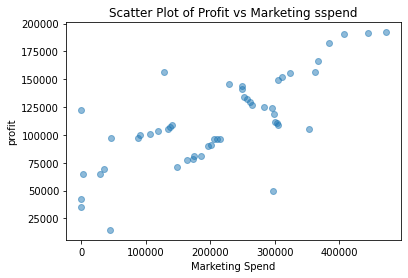

In [29]:
plt.scatter(df["Marketing Spend"], df["Profit"], alpha = 0.5)
plt.xlabel("Marketing Spend")
plt.ylabel("profit")
plt.title("Scatter Plot of Profit vs Marketing sspend")

Text(0, 0.5, 'Profit')

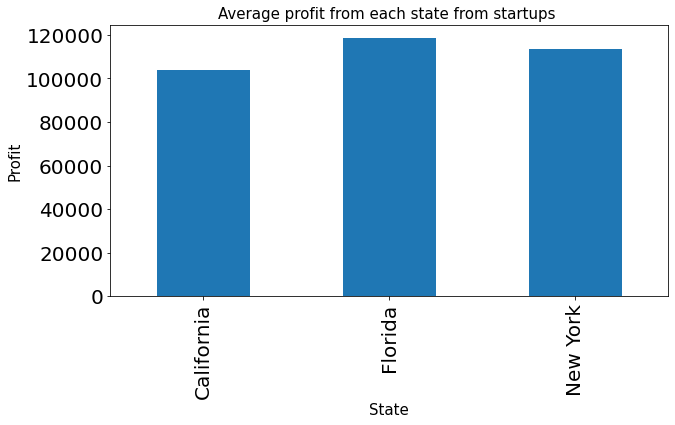

In [40]:
# To compare the state-wise average profit of the start-ups

state_wise_profit = df.groupby("State")["Profit"].mean().plot.bar(figsize = (10,5),fontsize = 20)

state_wise_profit.set_title("Average profit from each state from startups ", fontsize = 15)
state_wise_profit.set_xlabel("State", fontsize = 15)
state_wise_profit.set_ylabel("Profit", fontsize = 15)



In [42]:
# Total startups from the each states
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

* As we know, every independent variables should be in numerical value
* From the given dataset, values of states are in the type "Object"
* Hence we creating the **dummy** variables for each start-ups

In [43]:
df["Newyork"] = np.where(df["State"] == "New York", 1 , 0)
df["California"] = np.where(df["State"] == "California", 1 , 0)
df["Florida"] = np.where(df["State"] == "Florida", 1 , 0)

In [44]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Newyork,California,Florida
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [45]:
# Drop the original column State from the dataframe

df.drop(columns = ["State"], axis = 1, inplace = True)

In [46]:
df

,R&D Spend,Administration,Marketing Spend,Profit,Newyork,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1
5,131876.90,99814.71,362861.36,156991.12,1,0,0
6,134615.46,147198.87,127716.82,156122.51,0,1,0
7,130298.13,145530.06,323876.68,155752.60,0,0,1
8,120542.52,148718.95,311613.29,152211.77,1,0,0
9,123334.88,108679.17,304981.62,149759.96,0,1,0


* Now we Got a proper table
* we shall proceed further to separate the table as dependent and independent variables

## Creating Dependent and Independent Variables from the dataset

In [56]:
# Defining the dependent variable as 
dependent_variable = "Profit"

In [103]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [104]:
independent_variables

['Marketing Spend',
 'Florida',
 'Administration',
 'California',
 'R&D Spend',
 'Newyork']

In [105]:

X = df[independent_variables].values

In [106]:
# Create the dependent variable data

y = df[dependent_variable].values

##Splitting the data into train and Test

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0 )

In [108]:
X_train[0:10]

# Note, the values are very high, hence we need to transform the data into the scaler form

array([[2.1463481e+05, 1.0000000e+00, 1.0305749e+05, 0.0000000e+00,
        5.5493950e+04, 0.0000000e+00],
       [2.0551764e+05, 0.0000000e+00, 8.5047440e+04, 0.0000000e+00,
        4.6014020e+04, 1.0000000e+00],
       [1.3405007e+05, 1.0000000e+00, 1.4413598e+05, 0.0000000e+00,
        7.5328870e+04, 0.0000000e+00],
       [2.1079767e+05, 0.0000000e+00, 1.5769392e+05, 1.0000000e+00,
        4.6426070e+04, 0.0000000e+00],
       [2.9491957e+05, 1.0000000e+00, 1.1417579e+05, 0.0000000e+00,
        9.1749160e+04, 0.0000000e+00],
       [3.2387668e+05, 1.0000000e+00, 1.4553006e+05, 0.0000000e+00,
        1.3029813e+05, 0.0000000e+00],
       [2.5651292e+05, 1.0000000e+00, 1.5654742e+05, 0.0000000e+00,
        1.1994324e+05, 0.0000000e+00],
       [1.9039300e+03, 0.0000000e+00, 1.2415304e+05, 0.0000000e+00,
        1.0002300e+03, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 5.1743150e+04, 0.0000000e+00,
        5.4205000e+02, 1.0000000e+00],
       [1.0713838e+05, 0.0000000e+00,

In [109]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [110]:
X_train[0:10]

# Now look into the values of the x_train which changed into the value from 0 to 1 

array([[0.45494286, 1.        , 0.48655174, 0.        , 0.33561668,
        0.        ],
       [0.43561799, 0.        , 0.3173015 , 0.        , 0.2782839 ,
        1.        ],
       [0.28413435, 1.        , 0.87258866, 0.        , 0.45557444,
        0.        ],
       [0.44680961, 0.        , 1.        , 1.        , 0.2807759 ,
        0.        ],
       [0.62511553, 1.        , 0.59103645, 0.        , 0.55488118,
        0.        ],
       [0.68649342, 1.        , 0.88568959, 0.        , 0.7880179 ,
        0.        ],
       [0.54370828, 1.        , 0.98922572, 0.        , 0.72539353,
        0.        ],
       [0.0040356 , 0.        , 0.6847981 , 0.        , 0.0060492 ,
        1.        ],
       [0.        , 0.        , 0.00432296, 0.        , 0.00327821,
        1.        ],
       [0.22709197, 0.        , 0.95618996, 0.        , 0.39676926,
        1.        ]])

In [111]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [112]:
# Fitting Multiple Linear regression to training set
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

Note:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [114]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.99015279495

In [115]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [116]:
r2_score(y_test, y_pred)

0.9347068473282424

## Validating the assunmption

In [120]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [121]:
# Finding the Residuals
#Residual = Actual value - Predicted value
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

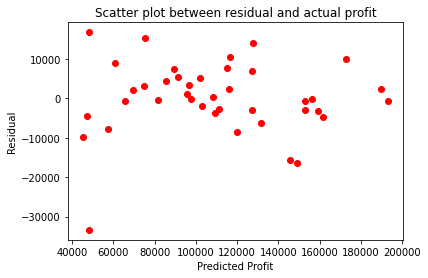

In [122]:
#  Plotting scatter plot between residual and fitted values
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

Seems like there is no significant pattern visible. So the assumption of homoscedasticity is valid.

Let's check if the mean of residuals is almost zero:

In [123]:
round((np.mean(residuals_train)))

0

Yes, the mean of residuals is almost zero!

In [124]:
df[independent_variables].corr()

,Marketing Spend,Florida,Administration,California,R&D Spend,Newyork
Marketing Spend,1.000000,0.205685,-0.032154,-0.168875,0.724248,-0.033670
Florida,0.205685,1.000000,0.010493,-0.492366,0.105711,-0.492366
Administration,-0.032154,0.010493,1.000000,-0.015478,0.241955,0.005145
California,-0.168875,-0.492366,-0.015478,1.000000,-0.143165,-0.515152
R&D Spend,0.724248,0.105711,0.241955,-0.143165,1.000000,0.039068
Newyork,-0.033670,-0.492366,0.005145,-0.515152,0.039068,1.000000


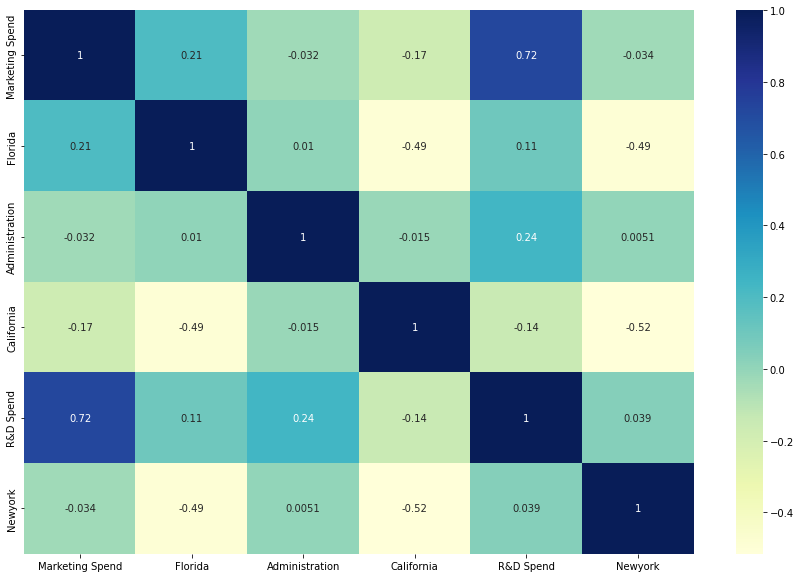

In [125]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[independent_variables].corr(),  annot=True, cmap="YlGnBu")

In [126]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  

In [127]:
print_metrics(y_train, y_train_pred)

MSE is 81571001.80077367
RMSE is 9031.666612578969
RMSE is 0.9501847627493607
MAE is 6341.535758081847
MAPE is 11.643543574245022


##Training set errors and test set errors are almost same, so no underfitting or overfitting detected.

In [128]:
#another Metric
#  Calculating adjusted R2

def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [129]:
adjusted_r2(len(y_train),len(independent_variables), y_train, y_train_pred)

0.9411274468856081